<a href="https://colab.research.google.com/github/mahboob82/horseman82.github.io/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a company using the past 60 day stock price



In [3]:
# Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [49]:
# Get the stock quote
df =  web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.012764
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.183548
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.096771


In [5]:
# Get the number of rows and columns 
df.shape

(2003, 6)

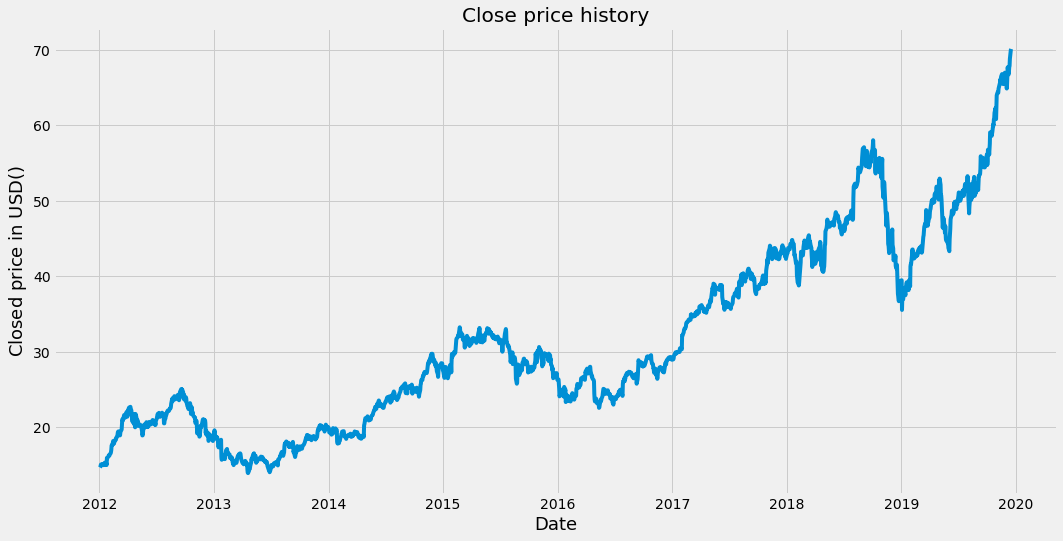

In [9]:
# Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closed price in USD$ ($)', fontsize=18)
plt.show()

In [12]:
# Create a new df with close column
data = df.filter(['Close'])
# convert the df to a numpy array
dataset = data.values
# get number of rows to train the model on # Let's try 80% of data to be trained
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1603

In [ ]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()



In [16]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [19]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [22]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [23]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [24]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


1543/1543 [==============================] - 40s 24ms/step - loss: 0.0022


In [34]:
#Create the testing dataset
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len : , :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [35]:
#Convert the data into a numpy array
x_test = np.array(x_test)

In [36]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [37]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions =scaler.inverse_transform(predictions)

In [38]:
# Get the RMSE (root mean squared error)- lower RMSE is better fit model
rmse = np.sqrt(np.mean(predictions- y_test) **2 )
rmse

1.0134548759460449

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


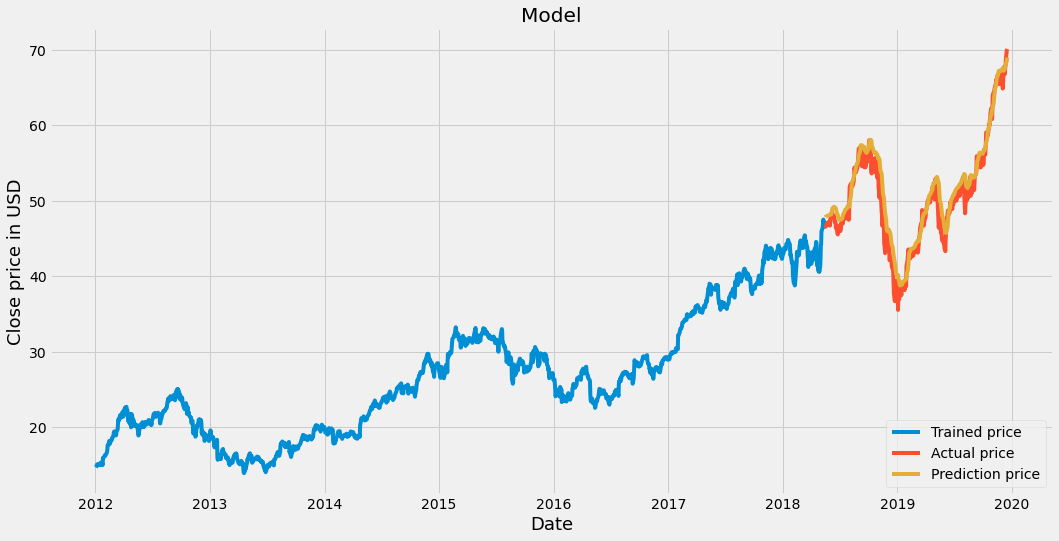

In [43]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len: ]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Trained price', 'Actual price', 'Prediction price'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted price
valid

In [46]:
# get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2013-01-01', end='2019-12-17')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 days closing price values and convert it to the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create a list
X_test = []
# append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test to numpy array
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price =scaler.inverse_transform(pred_price)
print(pred_price)

[[69.45637]]


In [48]:
# get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
